# GRIP : The Sparks Foundation

## Data Science and Business Analytics Intern

### Name : G Shiva Kumar

### Task 3- Exploratory Data Analysis - Retail
#### As a business manager, try to find out the weak areas where you can work to make more profit.

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the sample data
df=pd.read_csv('SampleSuperstore.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
df.Country

0       United States
1       United States
2       United States
3       United States
4       United States
            ...      
9989    United States
9990    United States
9991    United States
9992    United States
9993    United States
Name: Country, Length: 9994, dtype: object

In [7]:
df.drop('Postal Code',axis='columns',inplace=True)

In [8]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [9]:
corr=df[['Sales','Discount','Profit','Quantity']].corr()
corr.style.background_gradient(cmap='BrBG').set_precision(3)


,Sales,Discount,Profit,Quantity
Sales,1.000,-0.028,0.479,0.201
Discount,-0.028,1.000,-0.219,0.009
Profit,0.479,-0.219,1.000,0.066
Quantity,0.201,0.009,0.066,1.000


<AxesSubplot:>

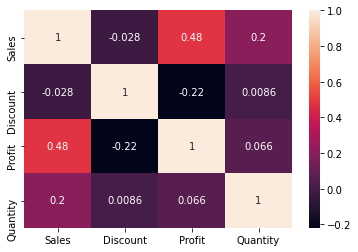

In [10]:
sns.heatmap(corr,annot=True)

In [11]:
#from above correlation matrix we can say that 
#sales & Profit have a good relation 
#Discount & Profit has neqative relation
#these relations have most impacted the profit

# Visualization

### Shipmode vs Profit

                       Sales  Quantity  Discount       Profit
Ship Mode                                                    
First Class     3.514284e+05      5693    253.17   48969.8399
Same Day        1.283631e+05      1960     82.75   15891.7589
Second Class    4.591936e+05      7423    270.15   57446.6354
Standard Class  1.358216e+06     22797    955.02  164088.7875


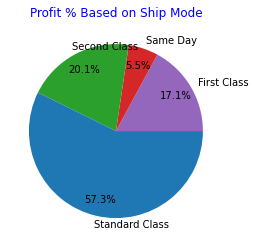

In [12]:
sm = df.groupby("Ship Mode").sum()
print(sm)

plt.title("Profit % Based on Ship Mode",color='Blue')
plt.pie(sm["Profit"],labels=sm.index,autopct="%1.1f%%",center=(3, 0), pctdistance=0.8, 
                            colors=['tab:purple', 'tab:red', 'tab:green', 'tab:blue'])

plt.show()

### sales were more in standard class as a result profit was also more

### Discount vs Profit

<AxesSubplot:title={'center':'Discount vs Profit'}, xlabel='Discount', ylabel='Profit'>

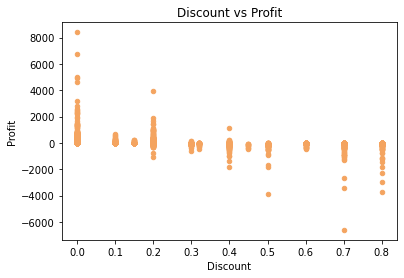

In [13]:
df.plot.scatter(x = 'Discount', y = 'Profit',
                  color = 'sandybrown', title = 'Discount vs Profit')

###  the more the discount offered, profit became negative

### Segment vs Profit

In [14]:
df_segment=df.groupby('Segment').sum()
df_segment["Profit %"] = df_segment["Profit"] / df_segment["Profit"].sum() * 100
df_segment

,Sales,Quantity,Discount,Profit,Profit %
Segment,,,,,
Consumer,1.161401e+06,19521,820.91,134119.2092,46.829820
Corporate,7.061464e+05,11608,477.85,91979.1340,32.115953
Home Office,4.296531e+05,6744,262.33,60298.6785,21.054227


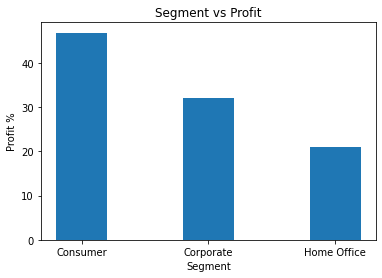

In [15]:
plt.bar(df_segment.index,df_segment['Profit %'],width=0.4)
plt.title("Segment vs Profit")
plt.ylabel("Profit %")
plt.xlabel('Segment')
plt.show()

#### There were more sales in Consumer Segment also more profit
#### The Profit in Home Office segment was low compared to other two segments

### City vs Profit 

In [16]:
df_city=df.groupby('City').sum()
df_city["Profit %"] = df_city["Profit"] / df_city["Profit"].sum() * 100
df_city


,Sales,Quantity,Discount,Profit,Profit %
City,,,,,
Aberdeen,25.500,3,0.0,6.6300,0.002315
Abilene,1.392,2,0.8,-3.7584,-0.001312
Akron,2729.986,65,7.5,-186.6356,-0.065167
Albuquerque,2220.160,65,0.8,634.0881,0.221402
Alexandria,5519.570,84,0.0,318.6183,0.111251
...,...,...,...,...,...
Woonsocket,195.550,15,0.0,78.6791,0.027472
Yonkers,7657.666,57,1.0,2767.7557,0.966405
York,817.978,19,2.1,-102.1692,-0.035674


Text(0.5, 1.0, 'City vs Profit')

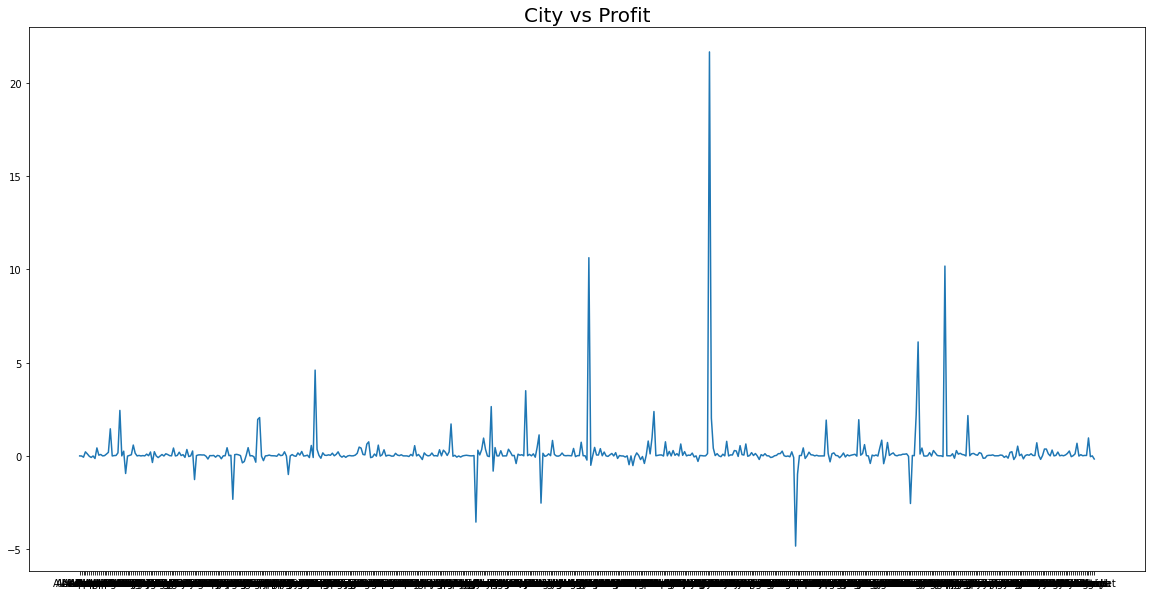

In [17]:
plt.figure(figsize=(20,10))
plt.plot(df_city.index, df_city["Profit %"])
plt.title("City vs Profit",size=20)


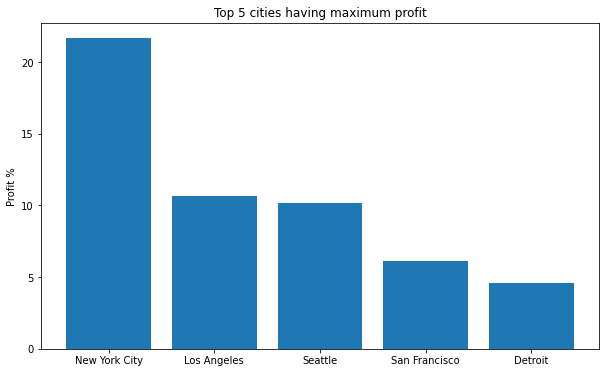

In [18]:
top5_cities=df_city.sort_values(by='Profit %',ascending=False)[0:5]
plt.figure(figsize=(10,6))
plt.bar(top5_cities.index, top5_cities["Profit %"])
plt.title("Top 5 cities having maximum profit")
plt.ylabel("Profit %",size=10)
plt.show()

#### New York was the city with highest profit

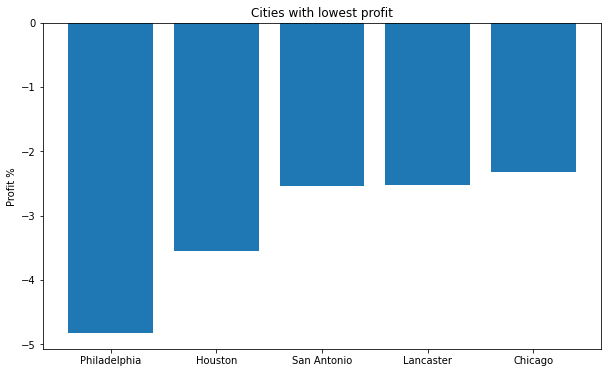

In [19]:
least5_cities=df_city.sort_values(by='Profit %')[0:5]
plt.figure(figsize=(10,6))
plt.bar(least5_cities.index, least5_cities["Profit %"])
plt.title("Cities with lowest profit")
plt.ylabel("Profit %",size=10)
plt.show()

#### Philadelphia was the city facing huge loses

## State vs Profit

In [20]:
df_state=df.groupby('State').sum()
df_state["Profit %"] = df_state["Profit"] / df_state["Profit"].sum() * 100
df_state.head(10)

,Sales,Quantity,Discount,Profit,Profit %
State,,,,,
Alabama,19510.6400,256,0.00,5786.8253,2.020561
Arizona,35282.0010,862,68.00,-3427.9246,-1.196913
Arkansas,11678.1300,240,0.00,4008.6871,1.399696
California,457687.6315,7667,145.60,76381.3871,26.669756
Colorado,32108.1180,693,57.60,-6527.8579,-2.279304
Connecticut,13384.3570,281,0.60,3511.4918,1.226092
Delaware,27451.0690,367,0.60,9977.3748,3.483756
District of Columbia,2865.0200,40,0.00,1059.5893,0.369972
Florida,89473.7080,1379,114.65,-3399.3017,-1.186919


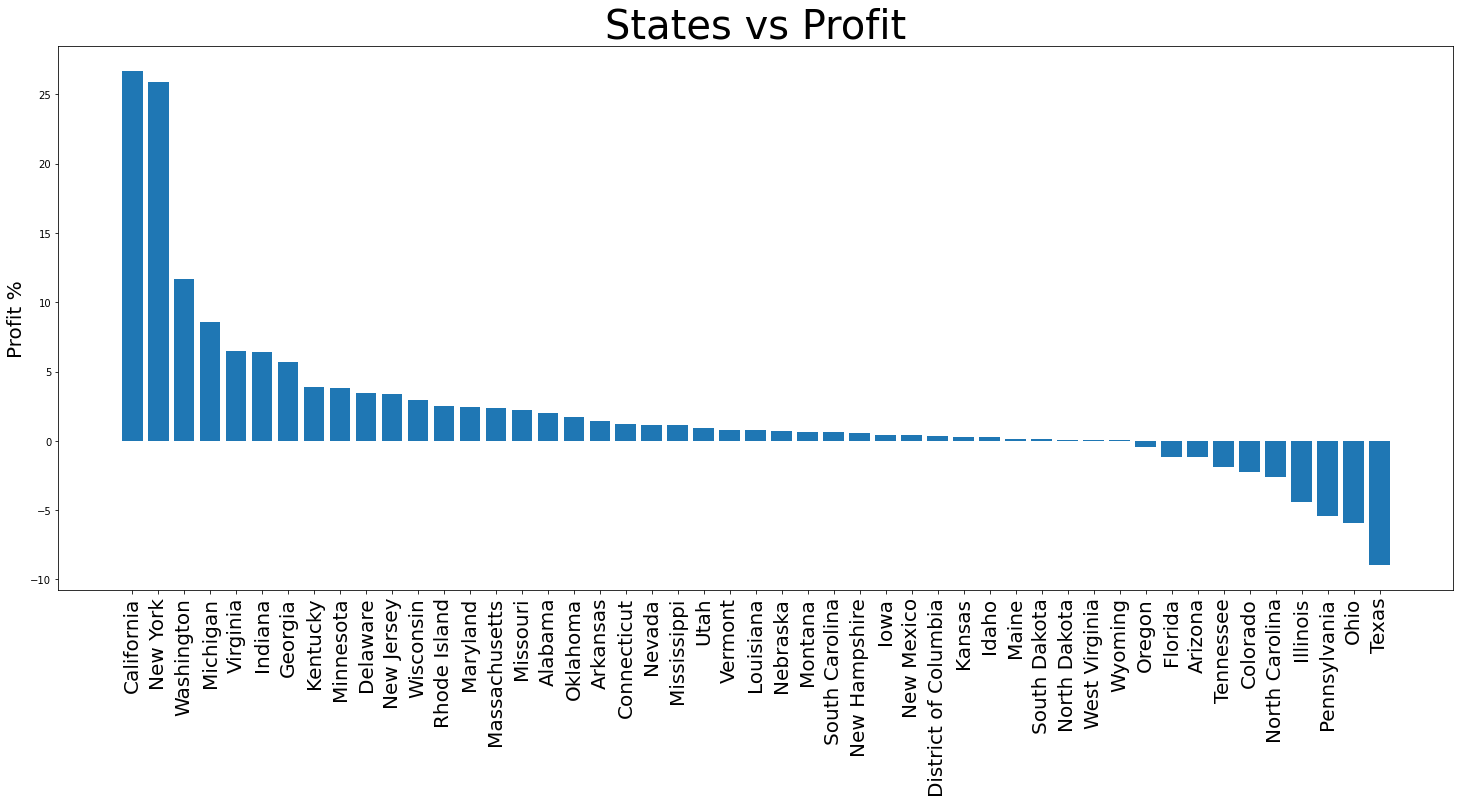

In [21]:
top5_states=df_state.sort_values(by='Profit %',ascending=False)
plt.figure(figsize=(25,10))
plt.bar(top5_states.index, top5_states["Profit %"])
plt.title("States vs Profit",size=40)
plt.ylabel("Profit %",size=20,fontsize=20)
plt.xticks(top5_states.index,rotation=90,size=15,fontsize=20)
plt.show()

#### NewYork and California has huge profits 
#### while Texas and Ohilo was facing loses

## Region vs Profit

In [22]:
df_region=df.groupby('Region').sum()
df_region["Profit %"] = df_region["Profit"] / df_region["Profit"].sum() * 100
df_region

,Sales,Quantity,Discount,Profit,Profit %
Region,,,,,
Central,501239.8908,8780,558.34,39706.3625,13.864098
East,678781.2400,10618,414.00,91522.7800,31.956610
South,391721.9050,6209,238.55,46749.4303,16.323295
West,725457.8245,12266,350.20,108418.4489,37.855997


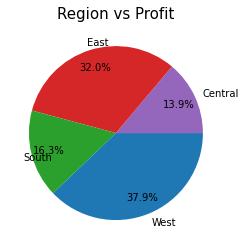

In [23]:
plt.title('Region vs Profit',size=15)
plt.pie(df_region["Profit"],labels=df_region.index,autopct="%1.1f%%",center=(3, 0), pctdistance=0.8, 
                            colors=['tab:purple', 'tab:red', 'tab:green', 'tab:blue'])

plt.show()

#### East and West regions has more sales and also more profits

## Category vs Profit

In [24]:
df_category=df.groupby('Category').sum()
df_category["Profit %"] = df_category["Profit"] / df_category["Profit"].sum() * 100
df_category


,Sales,Quantity,Discount,Profit,Profit %
Category,,,,,
Furniture,741999.7953,8028,368.89,18451.2728,6.442551
Office Supplies,719047.0320,22906,947.80,122490.8008,42.769579
Technology,836154.0330,6939,244.40,145454.9481,50.787870


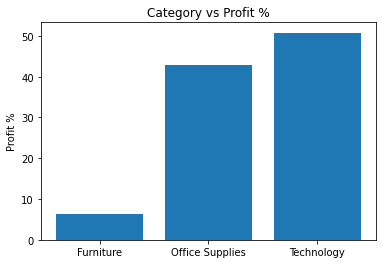

In [25]:
plt.bar(df_category.index,df_category['Profit %'])
plt.ylabel('Profit %',size=10)
plt.title('Category vs Profit %')
plt.show()

#### More profit eas coming in Technology category 
#### Profit was very low in Furniture category

## Sub-Category vs Profit

In [26]:
df_sub=df.groupby('Sub-Category').sum()
df_sub["Profit %"] = df_sub["Profit"] / df_sub["Profit"].sum() * 100
df_sub


,Sales,Quantity,Discount,Profit,Profit %
Sub-Category,,,,,
Accessories,167380.3180,2976,60.80,41936.6357,14.642832
Appliances,107532.1610,1729,77.60,18138.0054,6.333168
Art,27118.7920,3000,59.60,6527.7870,2.279279
Binders,203412.7330,5974,567.00,30221.7633,10.552401
Bookcases,114879.9963,868,48.14,-3472.5560,-1.212497
Chairs,328449.1030,2356,105.00,26590.1663,9.284372
Copiers,149528.0300,234,11.00,55617.8249,19.419834
Envelopes,16476.4020,906,20.40,6964.1767,2.431651
Fasteners,3024.2800,914,17.80,949.5182,0.331539


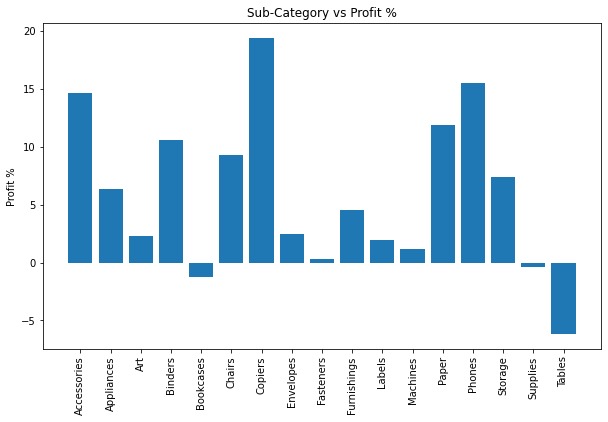

In [27]:
plt.figure(figsize=(10,6))
plt.bar(df_sub.index,df_sub['Profit %'])
plt.ylabel('Profit %',size=10)
plt.title('Sub-Category vs Profit %')
plt.xticks(rotation=90)
plt.show()

#### Tables was causing losses 
#### while Copiers and Accessories was gaining profits

# Conclusions:

##### 1) Increasing sales by shipping in standard class gives more profit
##### 2) Not offering huge discounts will help us to gain more profits.
##### 3) Focusing on Consumer segment will yeild better results
##### 4) Increasing sales in cities like Newyork and decreasing sales in cities like Philadelphia we can increase profits
##### 5) Increasing sales in states like Newyork,California and decreasing sales in cities like Texas,Oliho can increase profits
##### 6) More sales and profits was observed in East & West regions when compared to North & South regions
##### 7) Sales in Technology and Office supplies category has more demand than furniture
##### 8) Selling tables was causing losses , Copiers and Accessories was gaining profits

# 

# 

# ThankYou